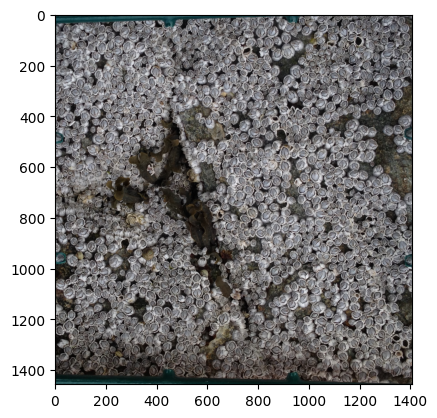

In [156]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# import roi
filename = 'img1.png'
roi = cv2.imread('roi_' + filename)
plt.imshow(roi)

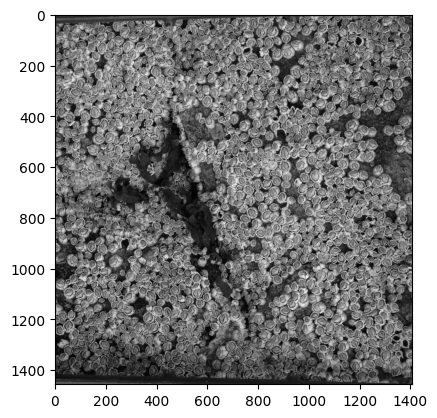

In [157]:
# Convert to grayscale and preprocess
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

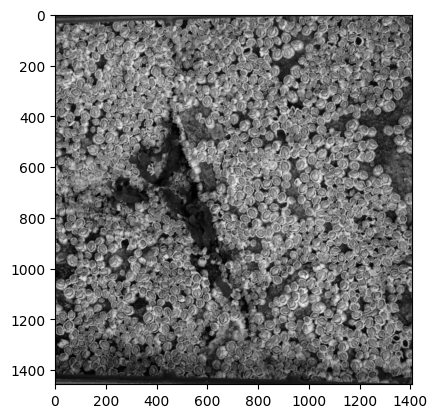

In [171]:
# gaussian blurring
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')

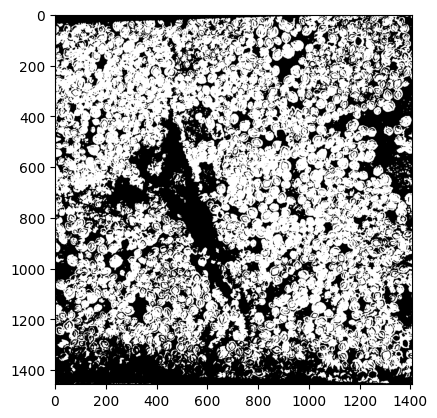

In [172]:
# automatic otsu thresholding
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

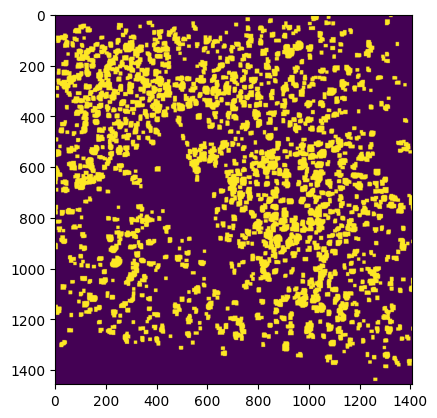

In [210]:
# Morphological operations to reduce noise
kernel = np.ones((3, 3), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=6)

plt.imshow(opened)

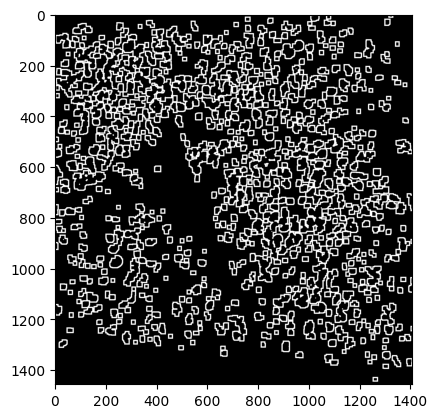

In [211]:
# sure background area
sure_bg = cv2.dilate(opened, kernel, iterations=3)
# Distance transform
dist = cv2.distanceTransform(opened, cv2.DIST_L2, 5)

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)

plt.imshow(unknown, cmap = 'gray')

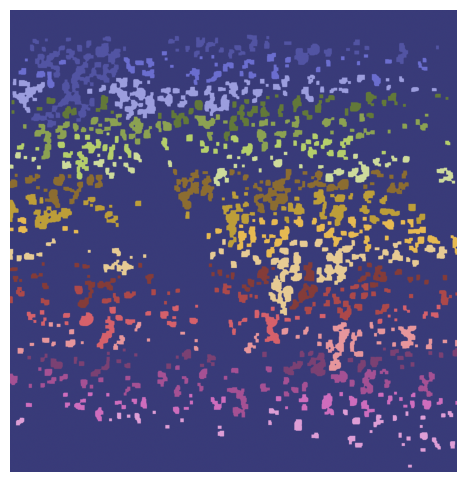

In [212]:
# Marker labelling
# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

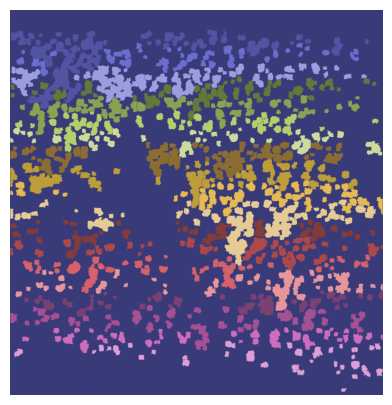

668


In [213]:
# watershed Algorithm
markers = cv2.watershed(roi, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

barnacles = []
for label in labels[2:]:

# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
	target = np.where(markers == label, 255, 0).astype(np.uint8)

# Perform contour extraction on the created binary image
	contours, hierarchy = cv2.findContours(
		target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
	)
	barnacles.append(contours[0])

# Draw the outline
roi_copy = roi.copy()

img = cv2.drawContours(roi_copy, barnacles, -1, color=(0, 23, 223), thickness=2)

print(len(barnacles))

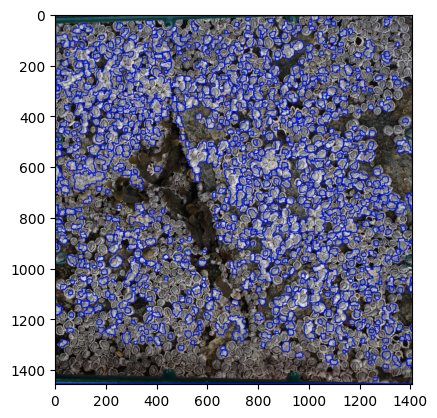

In [214]:
# Display the result
plt.imshow(img)